![image.png](https://i.imgur.com/a3uAqnb.png)

# Natural Language Processing (NLP)
# Third : Word embeddings
---

## 🔍 Sparse vs. Dense Vectors in NLP

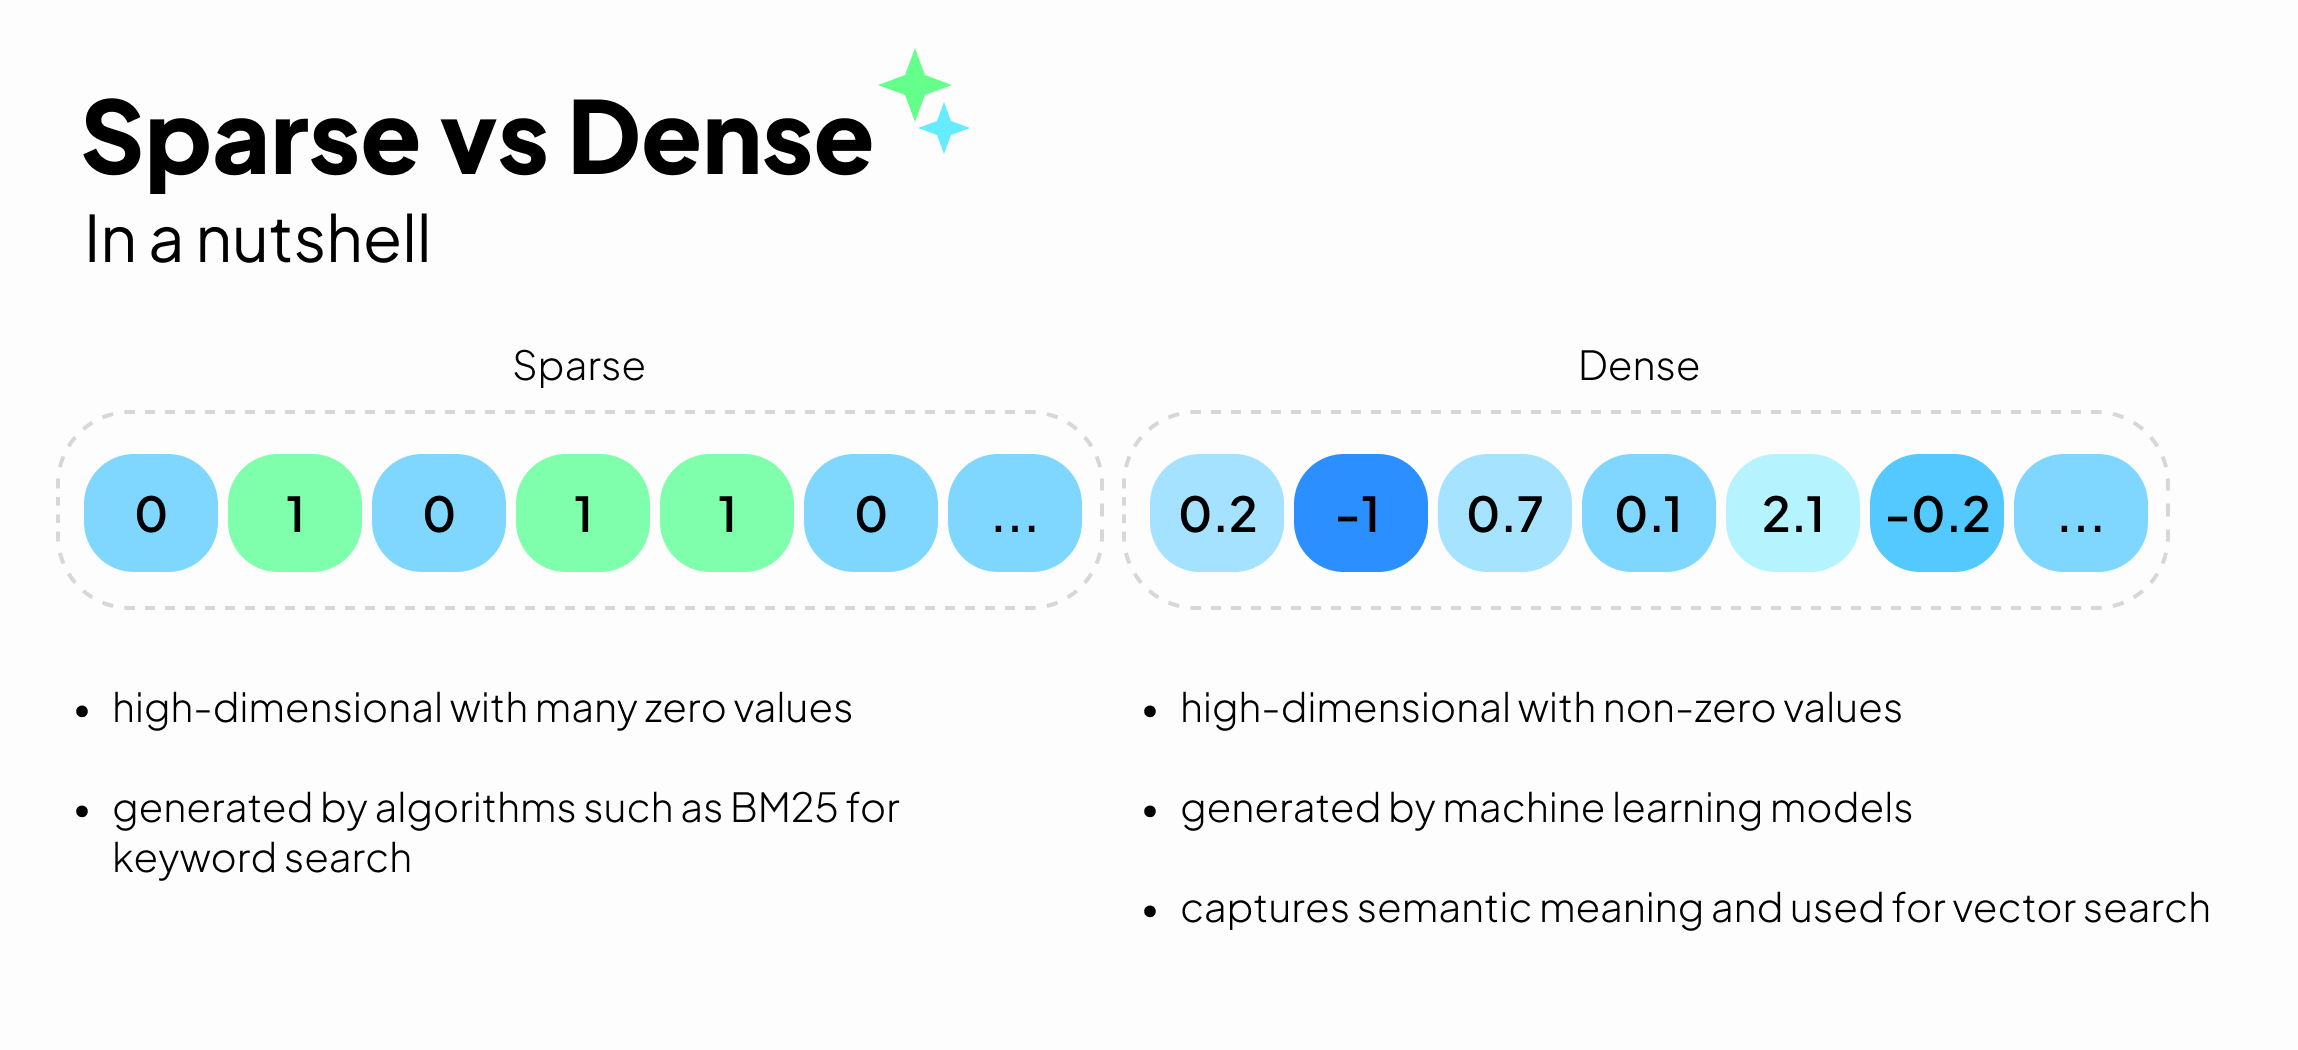
### 📌 What are Sparse Vectors?

- **Sparse vectors** are vectors where **most of the values are zero**.
- This is what happens in models like:
  - **Bag of Words (BoW)**
  - **TF-IDF**
- The length of the vector equals the size of the **entire vocabulary** (which can be tens of thousands of words).
- Only the positions corresponding to the words in the document have non-zero values.

✅ Example (Sparse BoW Vector):

| Word         | apple | love | machine | learning | AI  | ... | zebra |
|-------------|-------|------|---------|----------|-----|-----|-------|
| Document 1  | 1     | 1    | 1       | 1        | 0   | ... | 0     |

- This vector is mostly **zeros** → **sparse**.

---

### 📌 What are Dense Vectors?

- **Dense vectors** have **no zeros (or very few zeros)**—every element carries some numerical value.
- These are used in:
  - **Word2Vec**
  - **GloVe**
  - **FastText**
- Each word is represented as a **fixed-length dense vector** (e.g., 100 or 300 dimensions) regardless of vocabulary size.

✅ Example (Dense Word Embedding Vector):

| Dimension 1 | Dimension 2 | Dimension 3 | ... | Dimension 100 |
|------------|-------------|-------------|-----|---------------|
| 0.25       | -0.17       | 0.03        | ... | 0.41          |

- All values are **non-zero** → **dense**.

---

### ✅ Key Differences:

| Feature                    | Sparse Vectors (BoW, TF-IDF) | Dense Vectors (Embeddings)  |
|----------------------------|------------------------------|-----------------------------|
| Size of vector              | Equal to vocabulary size (huge) | Fixed size (e.g., 100, 300) |
| Values                      | Mostly zeros                 | Continuous real numbers      |
| Captures similarity?        | ❌ No                         | ✅ Yes                       |
| Memory efficiency           | ❌ Poor (very large)           | ✅ Good (compact)            |
| Examples                    | BoW, TF-IDF                  | Word2Vec, GloVe, FastText    |

---




# 📚 1-GloVe Word Embeddings: Mathematical Foundations

---

## 📌 What is GloVe?

**GloVe (Global Vectors for Word Representation)** is an unsupervised learning algorithm for generating **word embeddings** by leveraging **global statistical information** from a corpus.

Unlike Word2Vec, which predicts words based on local context, GloVe builds embeddings by analyzing the **co-occurrence of words** across the **entire corpus**.

---

## 1️⃣ Co-occurrence Matrix

- Let **X** be the **co-occurrence matrix** where:
  - $$ X_{ij} $$ represents the number of times **word j** appears in the context of **word i**.
  - The context is typically defined as a **fixed window of words** around the target word.

- The **total co-occurrences** for word **i**:
$$
X_i = \sum_{k} X_{ik}
$$

---

### 📝 Example Corpus:

> “I like deep learning”  
> “I like NLP”  
> “I enjoy flying”

**Vocabulary:**  
{ I, like, deep, learning, NLP, enjoy, flying }

---

### 🏗 Step-by-Step Construction:

✅ **Context Window = 1 word** on each side

| Word      | Context Words                            |
|-----------|------------------------------------------|
| I         | like, like, enjoy                        |
| like      | I, deep, I, NLP                          |
| deep      | like, learning                           |
| learning  | deep                                     |
| NLP       | like                                     |
| enjoy     | I, flying                                |
| flying    | enjoy                                    |

---

### 🔢 Co-occurrence Matrix \( X \) (Partial View):

|        | I  | like | deep | learning | NLP | enjoy | flying |
|--------|----|------|------|----------|-----|-------|--------|
| **I**      | 0  | 2    | 0    | 0        | 0   | 1     | 0      |
| **like**   | 2  | 0    | 1    | 0        | 1   | 0     | 0      |
| **deep**   | 0  | 1    | 0    | 1        | 0   | 0     | 0      |
| **learning** | 0 | 0   | 1    | 0        | 0   | 0     | 0      |
| **NLP**    | 0  | 1    | 0    | 0        | 0   | 0     | 0      |
| **enjoy**  | 1  | 0    | 0    | 0        | 0   | 0     | 1      |
| **flying** | 0  | 0    | 0    | 0        | 0   | 1     | 0      |

---

## 2️⃣ GloVe Objective Function

GloVe learns word vectors by minimizing this objective:

$$
J = \sum_{i,j=1}^{V} f(X_{ij}) \left( w_i^T \tilde{w}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2
$$

Where:

| Symbol        | Meaning                                        |
|--------------|-----------------------------------------------|
| $$ V $$       | Vocabulary size                                |
| $$ w_i $$     | Word vector for **target word i**              |
| $$ \tilde{w}_j $$ | Word vector for **context word j**         |
| $$ b_i $$     | Bias for target word                           |
| $$ \tilde{b}_j $$ | Bias for context word                      |
| $$ f(X_{ij}) $$ | Weighting function controlling impact of each co-occurrence |

---

## 3️⃣ Weighting Function $$ f(X_{ij}) $$

To prevent very rare or overly frequent co-occurrences from dominating learning, GloVe uses a weighting function:

$$
f(X_{ij}) =
\begin{cases}
\left( \frac{X_{ij}}{X_{max}} \right)^{\alpha} & \text{if } X_{ij} < X_{max} \\
1 & \text{otherwise}
\end{cases}
$$

- $$ X_{max} $$ = maximum cap on counts (hyperparameter)
- $$ alpha $$ = typically 0.75

---

## 4️⃣ Training and Gradient Descent

- GloVe uses **Stochastic Gradient Descent (SGD)** to update:
  - Word vectors $$ w_i $$ and $$ \tilde{w}_j $$
  - Biases $$ b_i $$ and $$ \tilde{b}_j $$

The partial derivatives of the loss with respect to vectors and biases are computed and updated iteratively.

---

## 5️⃣ Final Word Vectors

After training:
- Each word has two vectors: **target vector** and **context vector**.
- The **final word embedding** is usually the **sum** of both vectors:
$$
v_i = w_i + \tilde{w}_i
$$

---

## ✅ Summary of GloVe:

| Feature                | GloVe Embedding Characteristics          |
|------------------------|-----------------------------------------|
| Uses co-occurrence?     | ✅ Yes (global statistics)              |
| Predicts context?       | ❌ No (unlike Word2Vec)                 |
| Embedding type          | **Dense vectors**                      |
| Captures word similarity? | ✅ Yes                                 |
| Training method         | Weighted least squares + SGD           |

---



In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
# Importing necessary libraries
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
from gensim.test.utils import datapath, get_tmpfile  # Importing utility functions from gensim
from gensim.models import KeyedVectors  # Importing KeyedVectors for handling word vectors
from gensim.scripts.glove2word2vec import glove2word2vec  # Importing function to convert GloVe format to word2vec
import gensim.downloader as api  # Importing gensim downloader to load pre-trained models

In [ ]:
# Load GloVe word vectors
# Gensim has functionality to download a pre-trained model and load it. We use the 100d vectors below.
model = api.load('glove-wiki-gigaword-100')  # Loading pre-trained GloVe vectors with 100 dimensions

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Check some examples of word vectors
# print(len(model['bread']))
print(model['bread'])  # Print the word vector for the word 'bread'


[-0.66146    0.94335   -0.72214    0.17403   -0.42524    0.36303
  1.0135    -0.14802    0.25817   -0.20326   -0.64338    0.16632
  0.61518    1.397     -0.094506   0.0041843 -0.18976   -0.55421
 -0.39371   -0.22501   -0.34643    0.32076    0.34395   -0.7034
  0.23932    0.69951   -0.16461   -0.31819   -0.34034   -0.44906
 -0.069667   0.35348    0.17498   -0.95057   -0.2209     1.0647
  0.23231    0.32569    0.47662   -1.1206     0.28168   -0.75172
 -0.54654   -0.66337    0.34804   -0.69058   -0.77092   -0.40167
 -0.069351  -0.049238  -0.39351    0.16735   -0.14512    1.0083
 -1.0608    -0.87314   -0.29339    0.68278    0.61634   -0.088844
  0.88094    0.099809  -0.27161   -0.58026    0.50364   -0.93814
  0.67576   -0.43124   -0.10517   -1.2404    -0.74353    0.28637
  0.29012    0.89377    0.67406    0.86422   -0.30693   -0.14718
  0.078353   0.74013    0.32658   -0.052579  -1.1665     0.87079
 -0.69402   -0.75977   -0.37164   -0.11887    0.18551    0.041883
  0.59352    0.30519   -0.

In [ ]:
print(model['croissant'])  # Print the word vector for the word 'croissant'

[-0.25144    0.52157   -0.75452    0.28039   -0.31388    0.274
  1.1971    -0.10519    0.82544   -0.33398   -0.21417    0.22216
  0.14982    0.47384    0.41984    0.69397   -0.25999   -0.44414
  0.58296   -0.30851   -0.076455   0.33468    0.28055   -0.99012
  0.30349    0.39128    0.031526  -0.095395  -0.004745  -0.81347
  0.27869   -0.1812     0.14632   -0.42186    0.13857    1.139
  0.14925   -0.051459   0.37875   -0.2613     0.011081  -0.28881
 -0.38662   -0.3135    -0.1954     0.19248   -0.52995   -0.40674
 -0.25159    0.06272   -0.32724    0.28374   -0.2155    -0.061832
 -0.50134    0.0093959  0.30715    0.3873    -0.74554   -0.45947
  0.40032   -0.1378    -0.26968   -0.3946    -0.64876   -0.47149
 -0.085536   0.092795  -0.034018  -0.61906    0.19123    0.20563
  0.29056   -0.010908   0.15313    0.33144    0.33806    0.061708
  0.20785    0.65348   -0.053222   0.18589    0.32647   -0.11923
  0.42008   -0.26931    0.025489   0.0036535  0.1327    -0.22763
  0.07564    0.55773    0.2

# 🔍 Understanding `model.most_similar` in Word2Vec

---

## 📌 What Does `most_similar` Do?

The `model.most_similar()` function in **Word2Vec** finds the words whose embeddings are **most similar** to a **vector combination** of given words.

---

## ✅ Parameters:

| Parameter | Description | Example |
|-----------|-------------|---------|
| `positive` | Words (or weighted word tuples) that contribute **positively** to the result | `['king', 'woman']` or `[('king', 0.8), ('queen', 0.2)]` |
| `negative` | Words (or weighted word tuples) that contribute **negatively** | `['man']` or `[('man', 1.0)]` |
| `topn` | Number of most similar words to return | `topn=10` (default) |

---

## 🧮 Mathematical Explanation

The function performs **vector arithmetic** using the embeddings of the specified words.

### Example:

Given the word vectors:
- $$ \vec{v}_{\text{king}} $$
- $$ \vec{v}_{\text{man}} $$
- $$ \vec{v}_{\text{woman}} $$

The new vector \( \vec{v} \) is computed as:

$$
\vec{v} = \vec{v}_{\text{king}} + \vec{v}_{\text{woman}} - \vec{v}_{\text{man}}
$$

This new vector captures the **semantic concept** that relates these words (e.g., "queen").

---

## 📏 Cosine Similarity Formula:

To find the closest words to this new vector, the model calculates the **cosine similarity** between vectors.

The cosine similarity between two vectors \( \vec{a} \) and \( \vec{b} \) is defined as:

$$
\text{cosine\_similarity}(\vec{a}, \vec{b}) = \frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\| \times \|\vec{b}\|}
$$

Where:

- $$ \vec{a} \cdot \vec{b} $$ is the **dot product** of the two vectors.
- $$ \|\vec{a}\| $$ is the **Euclidean norm (magnitude)** of vector \( \vec{a} \).
- $$ \|\vec{b}\| $$ is the **Euclidean norm (magnitude)** of vector \( \vec{b} \).


---


In [ ]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [ ]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [ ]:
# Analogies
result = model.most_similar(positive=['woman', 'king'], negative=['man'])  # Perform analogy: woman is to king as man is to ?
print("{}: {:.4f}".format(*result[0]))  # Print the top result of the analogy with its similarity score

queen: 0.7699


In [ ]:
# Define a function for analogies
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])  # Perform analogy based on provided words
    return result[0][0]  # Return the top result

In [ ]:
analogy('pencil', 'sketching', 'camera')

'photographing'

In [ ]:
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'terrible'

# 🔍 Understanding `model.doesnt_match` in Word2Vec

---

## 📌 What Does `doesnt_match` Do?

The `model.doesnt_match()` function in **Word2Vec** identifies the word in a given list that **does not belong** to the same semantic context as the others.

It detects the **semantic outlier**—the word that is least similar to the pattern shared by the rest.

---

## ✅ Parameters:

| Parameter        | Description                                                   | Example                              |
|------------------|---------------------------------------------------------------|--------------------------------------|
| `list_of_words`  | A list of words where one word doesn't fit the common context | `['apple', 'banana', 'grape', 'car']` |

---

## 🔄 Mathematical Explanation

Given a list of **n word vectors**:

$$
\left\{ \vec{v}_1, \vec{v}_2, \ldots, \vec{v}_n \right\}
$$

---

### 1️⃣ Compute the Mean Vector:

The **mean vector** represents the **average semantic meaning** of the group of words:

$$
\vec{v}_{\text{mean}} = \frac{1}{n} \sum_{i=1}^{n} \vec{v}_i
$$

---

### 2️⃣ Compute Cosine Similarity:

For each word vector \( \vec{v}_i \), compute the **cosine similarity** with the mean vector \( \vec{v}_{\text{mean}} \):

$$
\text{cosine\_similarity}(\vec{v}_i, \vec{v}_{\text{mean}}) = \frac{\vec{v}_i \cdot \vec{v}_{\text{mean}}}{\|\vec{v}_i\| \times \|\vec{v}_{\text{mean}}\|}
$$

Where:

- The numerator:  
  $$ \vec{v}_i \cdot \vec{v}_{\text{mean}} $$  
  → This is the **dot product** between the word vector and the mean vector.

- The denominator:  
  $$ \|\vec{v}_i\| \times \|\vec{v}_{\text{mean}}\| $$  
  → These are the **Euclidean norms (magnitudes)** of the vectors.

---

### 3️⃣ Identify the Outlier:

- The word with the **lowest cosine similarity** to the mean vector is selected as the **odd one out**.
- This word is considered the **least semantically related** to the others in the list.

---



In [ ]:
# Word out of context
print(model.doesnt_match("breakfast cereal dinner lunch".split()))  # Find the word that doesn't fit the context

cereal


In [ ]:
# PCA for visualization
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:  # If no specific words are provided
        if sample > 0:  # If a sample size is specified
            words = np.random.choice(list(model.index_to_key), sample)  # Randomly select words from the model's vocabulary
        else:
            words = [word for word in model.index_to_key]  # Use all words in the model's vocabulary
    word_vectors = np.array([model[w] for w in words])  # Create an array of word vectors for the selected words
    twodim = PCA().fit_transform(word_vectors)[:,:2]  # Apply PCA to reduce dimensionality to 2D
    plt.figure(figsize=(6,6))  # Create a new figure for plotting
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')  # Plot the word vectors in 2D space
    for word, (x,y) in zip(words, twodim):  # Annotate each point with the corresponding word
        plt.text(x+0.05, y+0.05, word)

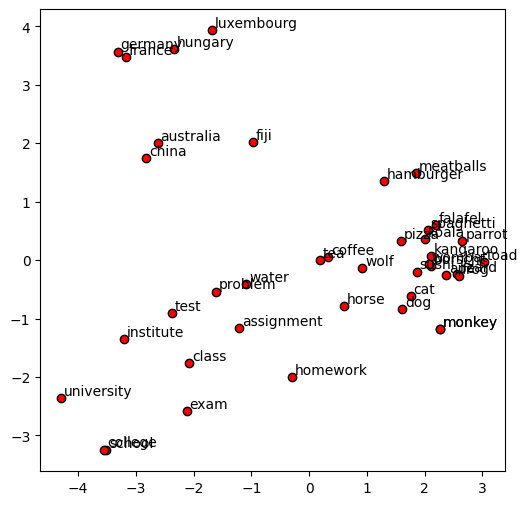

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

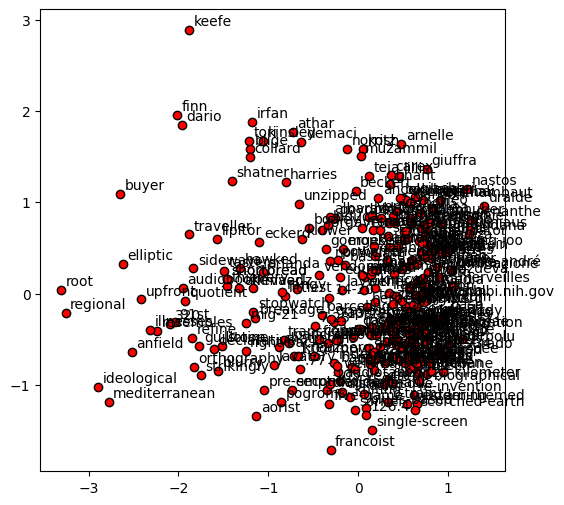

In [ ]:
# Visualize a random sample of 300 words
display_pca_scatterplot(model, sample=300)  # Visualize a random sample of 300 words from the model's vocabulary

# 📝 Exercise: Exploring Word Similarities with GloVe

---

## 🎯 Task 1: Exploring Word Similarities

In this task, you will use a **pre-trained GloVe model** to explore how words are related in semantic space.

---

### ✅ Instructions:

1. **Load the Pre-trained GloVe Model**
   - You can use `gensim` to load GloVe embeddings (either convert `.txt` to Word2Vec format or use pre-converted versions).
   - Recommended: Use **glove.6B.100d** (100-dimensional vectors).

2. **Explore Word Similarities**
   - For each of the following words:
     - `"apple"`
     - `"computer"`
     - `"university"`
   - Find and display the **top 5 most similar words** based on cosine similarity.

---

### ✅ Your Goals:

| Target Word    | Task                                        |
|---------------|---------------------------------------------|
| `"apple"`      | List the **top 5 most similar words**      |
| `"computer"`   | List the **top 5 most similar words**      |
| `"university"` | List the **top 5 most similar words**      |

---

### ✅ Expected Output (Example for `"apple"`):

| Rank | Similar Word | Similarity Score |
|------|--------------|------------------|
| 1    | ...          | ...              |
| 2    | ...          | ...              |
| 3    | ...          | ...              |
| 4    | ...          | ...              |
| 5    | ...          | ...              |

---




In [ ]:
# ✅ Function to find and display most similar words
def display_similar_words(word, top_n=5):
    try:
        similar_words = model.most_similar(word, topn=top_n)
        print(f"🔍 Top {top_n} words similar to '{word}':")
        for w, similarity in similar_words:
            print(f"   {w:<15} Similarity: {similarity:.4f}")
        print()
    except KeyError:
        print(f"❌ The word '{word}' is not in the model vocabulary.\n")

# ✅ Words to explore
words_to_check = ["apple", "computer", "university"]

# ✅ Run similarity checks
for word in words_to_check:
    display_similar_words(word)


🔍 Top 5 words similar to 'apple':
   microsoft       Similarity: 0.7449
   ibm             Similarity: 0.6822
   intel           Similarity: 0.6778
   software        Similarity: 0.6775
   dell            Similarity: 0.6741

🔍 Top 5 words similar to 'computer':
   computers       Similarity: 0.8752
   software        Similarity: 0.8373
   technology      Similarity: 0.7642
   pc              Similarity: 0.7366
   hardware        Similarity: 0.7290

🔍 Top 5 words similar to 'university':
   college         Similarity: 0.8294
   harvard         Similarity: 0.8156
   yale            Similarity: 0.8114
   professor       Similarity: 0.8104
   graduate        Similarity: 0.7993



# 📝 Exercise: Task 2 — Creating Word Analogies with GloVe

---

## 🎯 Objective:

In this task, you will explore how **word embeddings** can solve **analogy problems** by using **vector arithmetic** with pre-trained **GloVe embeddings**.

The classical analogy format is:
> **A is to B as C is to ?**  
Or mathematically:
> **B − A + C = ?**

---

## ✅ Your Tasks:

Using the loaded **GloVe model**, complete the following analogies:

| Analogy # | Given Words                            | Find:           |
|-----------|----------------------------------------|-----------------|
| 1         | teacher : school :: doctor : **?**     | (Expected: hospital, clinic...) |
| 2         | water : drink :: food : **?**          | (Expected: eat, consume...) |
| 3         | Paris : France :: Tokyo : **?**        | (Expected: Japan) |

---



In [ ]:
# ✅ Function to solve word analogies using vector arithmetic
def solve_analogy(word_a, word_b, word_c, top_n=1):
    try:
        result = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=top_n)
        print(f"\nAnalogy: '{word_a}' : '{word_b}' :: '{word_c}' : '{result[0][0]}' (Score: {result[0][1]:.4f})")
        return result
    except KeyError as e:
        print(f"❌ Word not found in vocabulary: {e}")
        return None

# ✅ Analogy 1: teacher : school :: doctor : ?
solve_analogy('teacher', 'school', 'doctor')

# ✅ Analogy 2: water : drink :: food : ?
solve_analogy('water', 'drink', 'food')

# ✅ Analogy 3: Paris : France :: Tokyo : ?
solve_analogy('paris', 'france', 'tokyo')



Analogy: 'teacher' : 'school' :: 'doctor' : 'hospital' (Score: 0.7483)

Analogy: 'water' : 'drink' :: 'food' : 'drinks' (Score: 0.7616)

Analogy: 'paris' : 'france' :: 'tokyo' : 'japan' (Score: 0.8856)


[('japan', 0.8855802416801453)]

# 📝 Exercise: Task 3 — Finding Out-of-Context Words with GloVe

---

## 🎯 Objective:

In this task, you will use **Word2Vec’s `doesnt_match` function** to identify the word that **does not belong** to the group in each of the following lists.

The goal is to find the **semantic outlier**.

---

## ✅ Your Word Lists:

| Set | Words                                        | Expected Outlier (Example) |
|-----|----------------------------------------------|----------------------------|
| 1   | ["red", "blue", "green", "apple"]            | "apple" (not a color)       |
| 2   | ["cat", "dog", "fish", "car"]                | "car" (not an animal)       |
| 3   | ["breakfast", "lunch", "dinner", "banana"]   | "banana" (not a mealtime)   |

---


In [ ]:
# ✅ Function to find the out-of-context word
def find_outlier(words):
    try:
        outlier = model.doesnt_match(words)
        print(f"List: {words}\n🚫 Outlier: '{outlier}'\n")
        return outlier
    except KeyError as e:
        print(f"❌ Missing word in vocabulary: {e}\n")
        return None

# ✅ Word groups to test
groups = [
    ["red", "blue", "green", "apple"],           # Expected: 'apple'
    ["cat", "dog", "fish", "car"],               # Expected: 'car'
    ["breakfast", "lunch", "dinner", "banana"]   # Expected: 'banana'
]

# ✅ Run the outlier detection for each group
for group in groups:
    find_outlier(group)


List: ['red', 'blue', 'green', 'apple']
🚫 Outlier: 'apple'

List: ['cat', 'dog', 'fish', 'car']
🚫 Outlier: 'car'

List: ['breakfast', 'lunch', 'dinner', 'banana']
🚫 Outlier: 'banana'



# 📝 Exercise: Task 4 — Visualizing Word Vectors using PCA

---

## 🎯 Objective:

In this task, you will visualize **pre-trained GloVe word vectors** in **2D space** using **Principal Component Analysis (PCA)**.

This helps you:
- Understand how words cluster based on semantic similarity.
- See relationships in word vector space.

---

## ✅ Word Groups:

| Group | Words                                           | Theme              |
|-------|-------------------------------------------------|--------------------|
| 1     | ["king", "queen", "man", "woman", "prince", "princess"] | Royalty & Gender   |
| 2     | ["car", "bicycle", "airplane", "train", "boat"] | Transportation     |
| 3     | ["dog", "cat", "fish", "bird", "hamster"]       | Animals & Pets     |

---



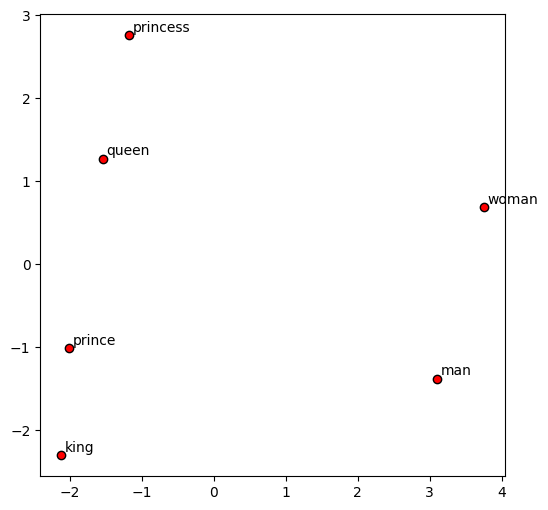

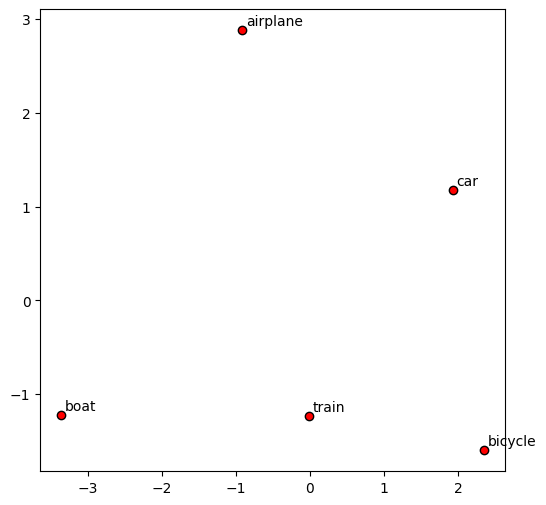

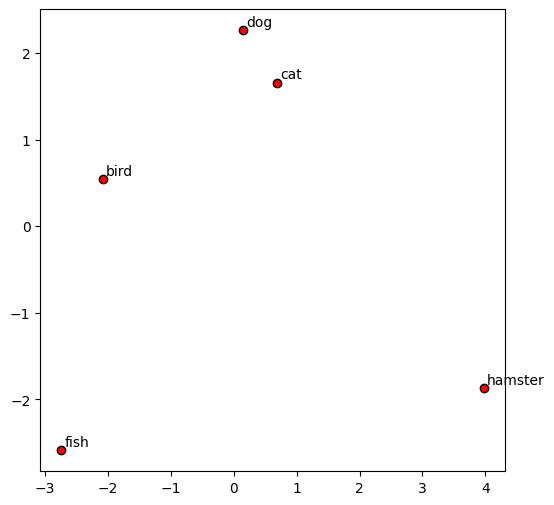

In [ ]:
# Function to display PCA scatter plot of word vectors
def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [word for word in model.index_to_key]

    word_vectors = np.array([model[word] for word in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

word_groups = [
    ["king", "queen", "man", "woman", "prince", "princess"],
    ["car", "bicycle", "airplane", "train", "boat"],
    ["dog", "cat", "fish", "bird", "hamster"]
]

for group in word_groups:
    display_pca_scatterplot(model, group)

### Contributed by : Lama Ayash